In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading In

In [2]:
#load in all of the datasets that I am responsible for and put them in one list
raw_2011 = pd.read_csv('./data/2011-crb.csv')
raw_2012 = pd.read_csv('./data/2012-crb.csv')
raw_2013 = pd.read_csv('./data/2013-crb.csv')
raw_2014 = pd.read_csv('./data/2014-crb.csv')
raw_2015 = pd.read_csv('./data/2015-crb.csv')
raw_2016 = pd.read_csv('./data/2016-crb.csv')
raw_2017 = pd.read_csv('./data/2017-crb.csv')
raw_2018 = pd.read_csv('./data/2018-crb.csv')
raw_2019 = pd.read_csv('./data/2019-crb.csv')
raw_2020 = pd.read_csv('./data/2020-crb.csv')
raw_2021 = pd.read_csv('./data/2021-crb.csv')
datalist = [raw_2011, raw_2012, raw_2013, raw_2014, raw_2015, raw_2016, raw_2017, raw_2018, raw_2019, raw_2020, raw_2021]

In [3]:
#quick look at one year's data
raw_2011.head()

Lat        Long    YYYYMMDD                 Basin_name Station_id  \
0  48.566667 -115.450000  20110210.0  KOOTENAI RIVER IN MONTANA        311   
1  48.300000 -116.066667  20110210.0  KOOTENAI RIVER IN MONTANA        323   
2  48.983333 -115.816667  20110210.0  KOOTENAI RIVER IN MONTANA        918   
3  48.916667 -114.766667  20110210.0  KOOTENAI RIVER IN MONTANA        500   
4  48.300000 -114.833333  20110210.0  KOOTENAI RIVER IN MONTANA        510   

  Acton_id       Station_name Elevation  Wteq_amt  Wteq_med  Wteq_amt_pct_med  \
0   15A08S  Banfield Mountain      5600      12.1      12.2              99.0   
1   16A08S      Bear Mountain      5400      37.4      38.6              97.0   
2   15A05S       Garver Creek      4250       7.7       6.9             112.0   
3   14A11S        Grave Creek      4300      13.1      11.4             115.0   
4   14A14S         Hand Creek      5035       9.6       7.8             123.0   

   Wteq_amt_pct_med_flag  Prec_wytd_amt  Prec_wytd_avg  Prec_wytd_pctavg  \
0                    NaN           17.5           17.8              98.0   
1                    NaN           54.2           49.5             109.0   
2                    NaN           12.2           12.9              95.0   
3                    NaN           18.6           22.8              82.0   
4                    NaN           14.7           11.7             126.0   

   Prec_wytd_pct_avg_flag       
0                     NaN  NaN  
1                     NaN  NaN  
2                     NaN  NaN  
3                     NaN  NaN  
4                     NaN  NaN

In [4]:
#put it all in one big dataframe
sams_df = pd.concat(datalist)

In [5]:
sams_df.isna().sum()

Lat                        264
Long                       264
YYYYMMDD                   264
Basin_name                 264
Station_id                   0
Acton_id                   264
Station_name               264
Elevation                    0
Wteq_amt                   264
Wteq_med                   264
Wteq_amt_pct_med           177
Wteq_amt_pct_med_flag     3156
Prec_wytd_amt              264
Prec_wytd_avg              264
Prec_wytd_pctavg            69
Prec_wytd_pct_avg_flag    3264
                          3080
dtype: int64

In [6]:
sams_df.shape

(3333, 17)

In [7]:
#make all columns snakecase
sams_df.rename(mapper = str.lower, axis = 1, inplace = True)
#reset the index, since it repeats due to the concatenation
sams_df.reset_index(drop = True, inplace= True)

In [8]:
sams_df[sams_df['lat'].isna()].head()

lat  long  yyyymmdd basin_name                    station_id acton_id  \
8   NaN   NaN       NaN        NaN     KOOTENAI RIVER IN MONTANA      NaN   
26  NaN   NaN       NaN        NaN          FLATHEAD RIVER BASIN      NaN   
42  NaN   NaN       NaN        NaN  UPPER CLARK FORK RIVER BASIN      NaN   
51  NaN   NaN       NaN        NaN                    BITTERROOT      NaN   
60  NaN   NaN       NaN        NaN  LOWER CLARK FORK RIVER BASIN      NaN   

   station_name        elevation  wteq_amt  wteq_med  wteq_amt_pct_med  \
8           NaN  Basin Index (%)       NaN       NaN             115.0   
26          NaN  Basin Index (%)       NaN       NaN             144.0   
42          NaN  Basin Index (%)       NaN       NaN             138.0   
51          NaN  Basin Index (%)       NaN       NaN             124.0   
60          NaN  Basin Index (%)       NaN       NaN             125.0   

    wteq_amt_pct_med_flag  prec_wytd_amt  prec_wytd_avg  prec_wytd_pctavg  \
8                     NaN            NaN            NaN             110.0   
26                    NaN            NaN            NaN             127.0   
42                    NaN            NaN            NaN             123.0   
51                    NaN            NaN            NaN             122.0   
60                    NaN            NaN            NaN             119.0   

    prec_wytd_pct_avg_flag     
8                      NaN     
26                     NaN     
42                     NaN     
51                     NaN     
60                     NaN

In [9]:
sams_df.dropna(thresh = 6).isna().sum()

lat                          0
long                         0
yyyymmdd                     0
basin_name                   0
station_id                   0
acton_id                     0
station_name                 0
elevation                    0
wteq_amt                     0
wteq_med                     0
wteq_amt_pct_med           177
wteq_amt_pct_med_flag     2892
prec_wytd_amt                0
prec_wytd_avg                0
prec_wytd_pctavg            69
prec_wytd_pct_avg_flag    3000
                          3069
dtype: int64

In [10]:
#replacing the SNOTEL missing data codes with Nulls.
sams_df.replace({-999: None, -998:None, -997: None}, inplace= True)

In [11]:
#dropping every row with too many nulls.  What's left, we can impute.
sams_df.dropna(thresh = 12, inplace= True)

In [12]:
sams_df.isna().sum()

lat                          0
long                         0
yyyymmdd                     0
basin_name                   0
station_id                   0
acton_id                     0
station_name                 0
elevation                    0
wteq_amt                     4
wteq_med                    90
wteq_amt_pct_med           116
wteq_amt_pct_med_flag     3008
prec_wytd_amt                6
prec_wytd_avg               11
prec_wytd_pctavg            17
prec_wytd_pct_avg_flag    3008
                          3008
dtype: int64

In [13]:
#let's swap the date column from a string to an actual datetime
sams_df['yyyymmdd'] = pd.to_datetime(sams_df['yyyymmdd'], format='%Y%m%d')

In [14]:
sams_df.dtypes

lat                              float64
long                             float64
yyyymmdd                  datetime64[ns]
basin_name                        object
station_id                        object
acton_id                          object
station_name                      object
elevation                         object
wteq_amt                         float64
wteq_med                         float64
wteq_amt_pct_med                 float64
wteq_amt_pct_med_flag            float64
prec_wytd_amt                    float64
prec_wytd_avg                    float64
prec_wytd_pctavg                 float64
prec_wytd_pct_avg_flag           float64
                                  object
dtype: object

In [15]:
#change the elevation and station columns to ints as well
sams_df['elevation'] = sams_df['elevation'].map(int)
sams_df['station_id'] = sams_df['station_id'].map(int)

In [16]:
#drop the flag columns, as they are null for the entire dataset.
sams_df.drop(columns = ['wteq_amt_pct_med_flag', 'prec_wytd_pct_avg_flag', ' '], inplace = True)

In [17]:
#how many nulls are left?
sams_df.isna().sum()

lat                   0
long                  0
yyyymmdd              0
basin_name            0
station_id            0
acton_id              0
station_name          0
elevation             0
wteq_amt              4
wteq_med             90
wteq_amt_pct_med    116
prec_wytd_amt         6
prec_wytd_avg        11
prec_wytd_pctavg     17
dtype: int64

In [34]:
len(sams_df.basin_name.unique())

24

In [18]:
#building a function to do the same for all my other null features
features_to_fill = ['wteq_amt', 'wteq_med', 'wteq_amt_pct_med', 'prec_wytd_amt', 'prec_wytd_avg', 'prec_wytd_pctavg']
def null_filler(feature):
   return sams_df.groupby(by = sams_df['yyyymmdd'])[feature].transform(lambda x: x.fillna(x.median()))
    

In [19]:
for feature in features_to_fill:
    sams_df[feature] = null_filler(feature)

In [20]:
sams_df.isna().sum()

lat                 0
long                0
yyyymmdd            0
basin_name          0
station_id          0
acton_id            0
station_name        0
elevation           0
wteq_amt            0
wteq_med            0
wteq_amt_pct_med    0
prec_wytd_amt       0
prec_wytd_avg       0
prec_wytd_pctavg    0
dtype: int64

In [21]:
#since we're doing time-series work, let's make the index that date
sams_df.set_index('yyyymmdd', inplace = True)

In [23]:
 clean_df = pd.concat([sams_df.drop(columns = 'basin_name')
          , pd.get_dummies(data = sams_df.basin_name)], axis = 1)

## Nulls imputed, now for some statistics

In [24]:
clean_df.describe()

lat         long   station_id    elevation     wteq_amt  \
count  3008.000000  3008.000000  3008.000000  3008.000000  3008.000000   
mean     45.418334  -116.424640   605.074468  5979.151928    14.972374   
std       1.852166     3.534227   175.160375  1541.654299     9.025920   
min      41.233333  -123.366667   302.000000  2060.000000     0.000000   
25%      43.950000  -119.833333   466.000000  4930.000000     8.400000   
50%      45.183333  -115.666667   608.000000  5870.000000    13.300000   
75%      46.983333  -113.950000   747.000000  7180.000000    20.100000   
max      48.983333  -110.050000   932.000000  9580.000000    64.600000   

          wteq_med  wteq_amt_pct_med  prec_wytd_amt  prec_wytd_avg  \
count  3008.000000       3008.000000    3008.000000    3008.000000   
mean     15.843816         95.675532      24.864894      24.864528   
std       8.280473         32.367827      16.230453      15.263817   
min       0.000000          0.000000       3.200000       6.000000   
25%       9.900000         81.000000      13.600000      14.100000   
50%      14.000000         95.000000      20.400000      21.200000   
75%      20.700000        113.000000      31.100000      31.700000   
max      47.600000        553.000000     124.600000      99.400000   

       prec_wytd_pctavg  ...  LOWER COLUMBIA, HOOD RIVER  OWYHEE MALHEUR  \
count       3008.000000  ...                 3008.000000     3008.000000   
mean         100.551529  ...                    0.021941        0.033577   
std           22.840754  ...                    0.146517        0.180168   
min           30.000000  ...                    0.000000        0.000000   
25%           86.000000  ...                    0.000000        0.000000   
50%           99.000000  ...                    0.000000        0.000000   
75%          113.000000  ...                    0.000000        0.000000   
max          222.000000  ...                    1.000000        1.000000   

       RAFT, GOOSE, SALMON FALLS, BRUNEAU  SNAKE ABOVE PALISADES  \
count                         3008.000000            3008.000000   
mean                             0.029255               0.054854   
std                              0.168549               0.227732   
min                              0.000000               0.000000   
25%                              0.000000               0.000000   
50%                              0.000000               0.000000   
75%                              0.000000               0.000000   
max                              1.000000               1.000000   

       UMATILLA, WALLA WALLA, WILLOW  UPPER CLARK FORK RIVER BASIN  \
count                    3008.000000                   3008.000000   
mean                        0.018285                      0.054854   
std                         0.134001                      0.227732   
min                         0.000000                      0.000000   
25%                         0.000000                      0.000000   
50%                         0.000000                      0.000000   
75%                         0.000000                      0.000000   
max                         1.000000                      1.000000   

       WEISER, PAYETTE, BOISE  \
count             3008.000000   
mean                 0.065824   
std                  0.248016   
min                  0.000000   
25%                  0.000000   
50%                  0.000000   
75%                  0.000000   
max                  1.000000   

       WHITE, GREEN, CEDAR, SKYKOMISH, SNOQUALMI, BAKER, SKAGIT   WILLAMETTE  \
count                                        3008.000000         3008.000000   
mean                                            0.032247            0.073138   
std                                             0.176686            0.260407   
min                                             0.000000            0.000000   
25%                                             0.000000            0.000000   
50%       

(array([451., 999., 735., 477., 183., 102.,  50.,   8.,   2.,   1.]),
 array([ 0.  ,  6.46, 12.92, 19.38, 25.84, 32.3 , 38.76, 45.22, 51.68,
        58.14, 64.6 ]),
 <BarContainer object of 10 artists>)

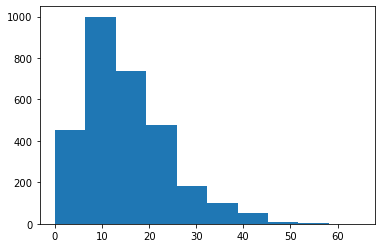

In [25]:
plt.hist(clean_df['wteq_amt'])

(array([ 99., 583., 893., 547., 406., 218., 142.,  43.,  55.,  22.]),
 array([ 0.  ,  4.76,  9.52, 14.28, 19.04, 23.8 , 28.56, 33.32, 38.08,
        42.84, 47.6 ]),
 <BarContainer object of 10 artists>)

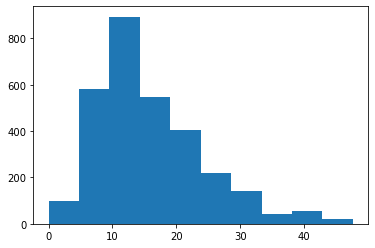

In [26]:
plt.hist(clean_df['wteq_med'])

In [27]:
clean_df.to_csv('data/sams_clean_data.csv', index = True)